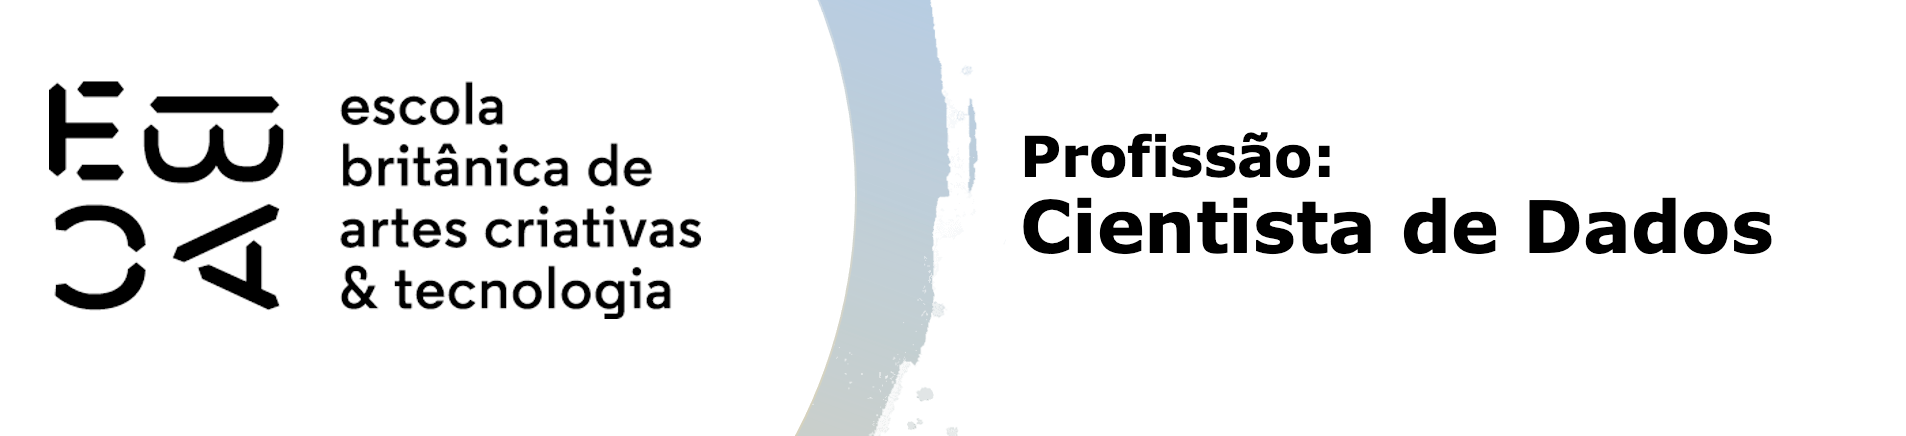

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

In [34]:
import statsmodels.api as sm

In [35]:
df = pd.read_csv('../mod34 regressao 3/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [37]:
tamanho_da_amostra = 7500
df = df.sample(n=tamanho_da_amostra, random_state=7)
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
61121,2015-02-01,6793,M,S,S,0,Assalariado,Superior completo,Casado,Casa,46,3.627397,2.0,5488.90
202069,2015-05-01,12346,M,S,S,0,Empresário,Médio,Casado,Casa,50,2.528767,2.0,36040.65
48162,2015-01-01,15236,F,N,S,0,Assalariado,Superior completo,Solteiro,Casa,54,7.958904,1.0,6622.45
592719,2015-12-01,6325,M,S,N,2,Assalariado,Superior completo,Casado,Casa,32,1.991781,4.0,5725.04
590176,2015-12-01,874,F,N,S,0,Pensionista,Superior completo,Casado,Casa,62,NaN,2.0,35586.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184460,2015-04-01,1578,F,N,N,0,Empresário,Médio,Casado,Governamental,37,17.487671,2.0,134255.31
45131,2015-01-01,12780,M,N,S,0,Assalariado,Médio,Casado,Com os pais,40,7.865753,2.0,4525.38
321427,2015-07-01,3155,F,S,N,1,Empresário,Médio,Casado,Casa,35,10.643836,3.0,7666.00
703825,2016-03-01,4466,F,N,N,0,Empresário,Médio,União,Casa,44,13.435616,2.0,6842.02


In [39]:
df.isna().sum()

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            1243
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [40]:
df.tempo_emprego = df.tempo_emprego.fillna(df.tempo_emprego.mean())

In [41]:
df.data_ref = pd.to_datetime(df.data_ref)

In [42]:
max_data = df.data_ref.max()

In [43]:
data_corte = max_data - pd.DateOffset(months=3)

In [44]:
df_test = df[df.data_ref>=data_corte]
df_train = df[df.data_ref<data_corte]

In [45]:
res = smf.ols('np.log(renda) ~ sexo+posse_de_veiculo+posse_de_imovel+qtd_filhos+tipo_renda+educacao+estado_civil+tipo_residencia+idade+tempo_emprego+I(tempo_emprego**2) +qt_pessoas_residencia',data=df_train).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     177.6
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:49:03   Log-Likelihood:                -7167.1
No. Observations:                5485   AIC:                         1.439e+04
Df Residuals:                    5459   BIC:                         1.456e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            8.1204      0.589     13.790      0.000       6.966       9.275
sexo[T.M]                            0.1620      0.028      5.689      0.000       0.106       0.218
posse_de_veiculo[T.S]               -0.0448      0.027     -1.649      0.099      -0.098       0.008
posse_de_imovel[T.S]                 0.2154      0.027      7.952      0.000       0.162       0.268
tipo_renda[T.Bolsista]               0.1237      0.402      0.307      0.759      -0.665       0.913
tipo_renda[T.Empresário]             0.0773      0.031      2.527      0.012       0.017       0.137
tipo_renda[T.Pensionista]           -0.3291      0.045     -7.360      0.000      -0.417      -0.241
tipo_renda[T.Servidor público]       0.1287      0.046      2.814      0.005       0.039       0.218
educacao[T.Médio]                    0.0164      0.110      0.149      0.881      -0.199       0.232
educacao[T.Pós graduação]            0.5823      0.357      1.633      0.103      -0.117       1.281
educacao[T.Superior completo]        0.1373      0.111      1.231      0.218      -0.081       0.356
educacao[T.Superior incompleto]     -0.0080      0.127     -0.063      0.950      -0.257       0.241
estado_civil[T.Separado]            -0.0965      0.289     -0.334      0.739      -0.663       0.470
estado_civil[T.Solteiro]            -0.0554      0.285     -0.195      0.846      -0.614       0.503
estado_civil[T.União]                0.0023      0.047      0.049      0.961      -0.090       0.095
estado_civil[T.Viúvo]               -0.1028      0.291     -0.353      0.724      -0.674       0.468
tipo_residencia[T.Casa]             -0.0295      0.096     -0.308      0.758      -0.217       0.158
tipo_residencia[T.Com os pais]       0.0539      0.109      0.493      0.622      -0.160       0.268
tipo_residencia[T.Comunitário]      -0.1932      0.184     -1.053      0.292      -0.553       0.167
tipo_residencia[T.Estúdio]           0.1108      0.173      0.642      0.521      -0.228       0.449
tipo_residencia[T.Governamental]    -0.1139      0.117     -0.974      0.330      -0.343       0.115
qtd_filhos                           0.1018      0.284      0.358      0.720      -0.456       0.659
idade                                0.0042      0.002      2.635      0.008       0.001       0.007
tempo_emprego                        0.1349      0.005     26.177      0.000       0.125       0.145
I(tempo_emprego ** 2)               -0.0003      0.000     -1.517      0.129      -0.001    7.74e-05
qt_pessoas_residencia               -0.0878      0.284     -0.309      0.757      -0.644       0.469
==============================================================================
Omnibus:                        7.283   Durbin-Watson:                   1.

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

<AxesSubplot:ylabel='renda'>

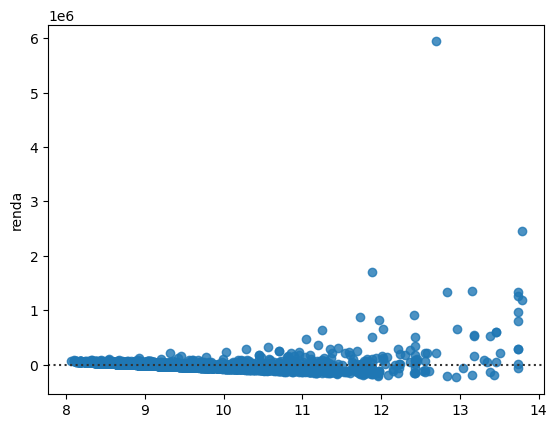

In [46]:
sns.residplot(x=res.predict(),y=df_train.renda)

## sem nenhum padrão marcante


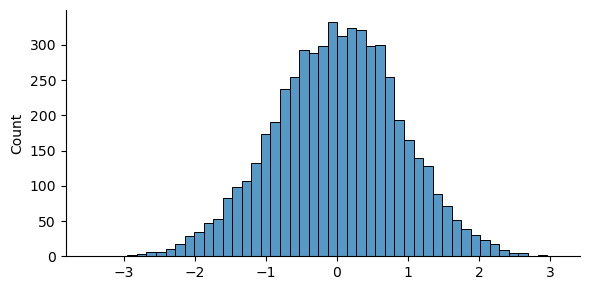

In [47]:
#Esperamos uma imagem parecida com um sino ao fazer esse gráfico
sns.displot(res.resid, height=3, aspect=2);

<AxesSubplot:>

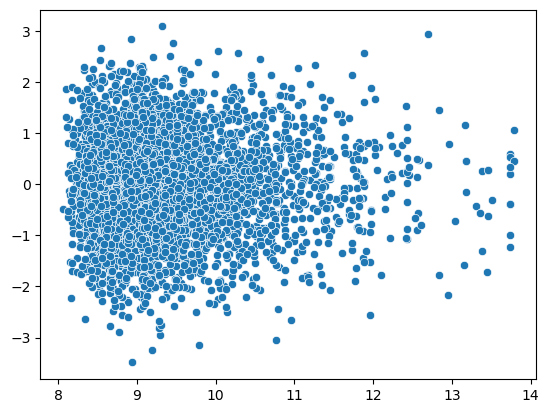

In [48]:
#valor previsto vs resíduo
sns.scatterplot(x = res.predict(), y = res.resid)

In [49]:
df_train.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [50]:
df_train['resid'] = res.resid

C:\Users\felip\AppData\Local\Temp\ipykernel_5704\4226002195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['resid'] = res.resid


<AxesSubplot:xlabel='sexo', ylabel='resid'>

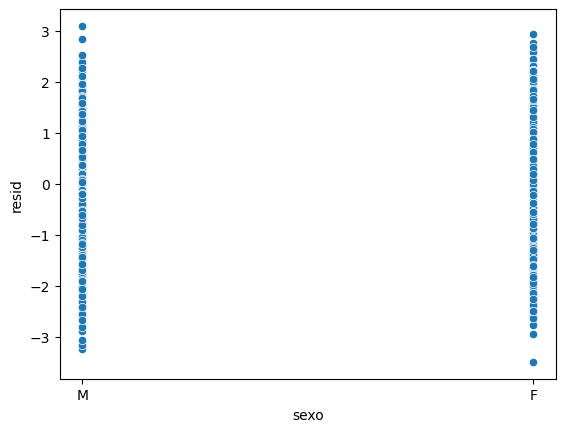

In [51]:
sns.scatterplot(x='sexo',y='resid',data=df_train)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='resid'>

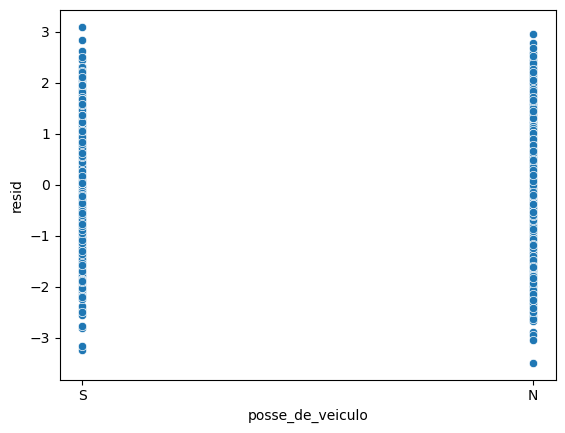

In [52]:
sns.scatterplot(x='posse_de_veiculo',y='resid',data=df_train)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='resid'>

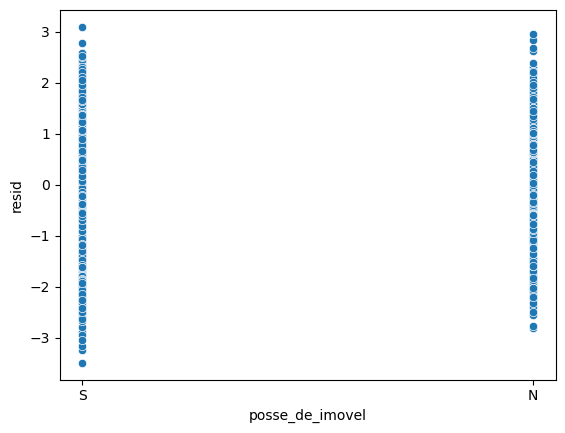

In [53]:
sns.scatterplot(x='posse_de_imovel',y='resid',data=df_train)

<AxesSubplot:xlabel='tipo_renda', ylabel='resid'>

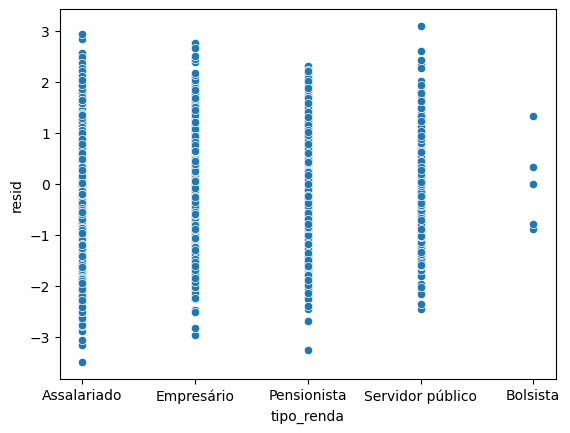

In [54]:
sns.scatterplot(x='tipo_renda',y='resid',data=df_train)

C:\Users\felip\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


<AxesSubplot:xlabel='qtd_filhos', ylabel='resid'>

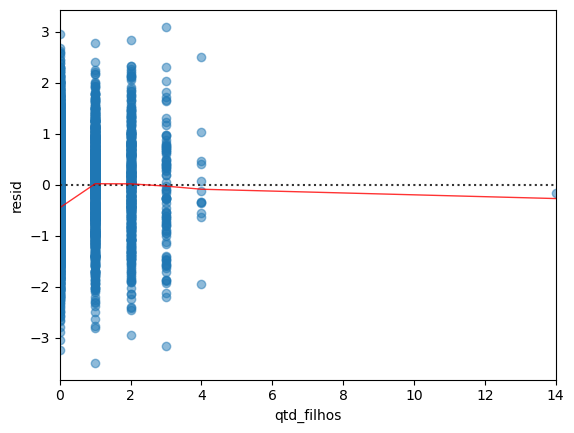

In [55]:
sns.residplot(x=df_train['qtd_filhos'],y=df_train['resid'],lowess=True,scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

<AxesSubplot:xlabel='idade', ylabel='resid'>

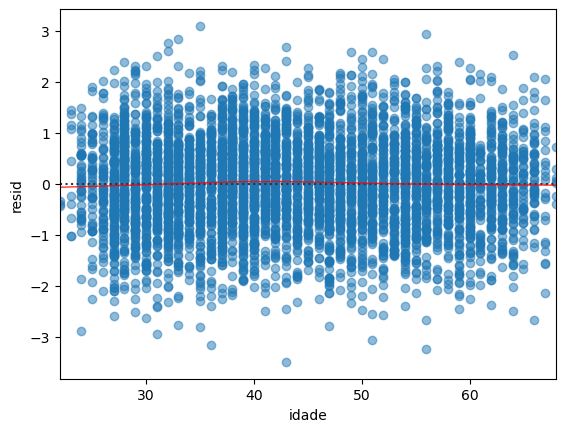

In [56]:
sns.residplot(x=df_train['idade'],y=df_train['resid'],lowess=True,scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

<AxesSubplot:xlabel='tempo_emprego', ylabel='resid'>

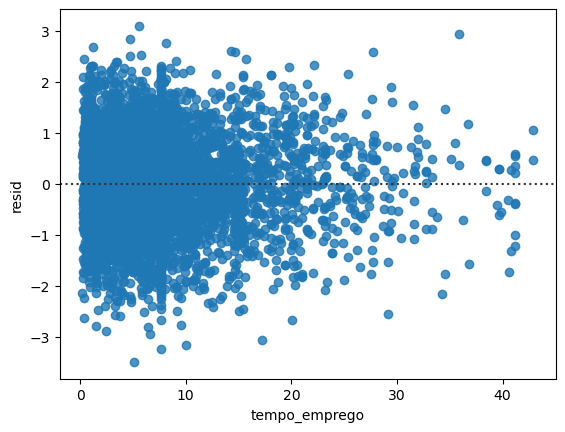

In [57]:
sns.residplot(x=df_train['tempo_emprego'],y=df_train['resid'])

In [58]:
#criando coluna mes a partir da coluna data_ref que é um datetime
df_train['mes'] = df_train.data_ref.dt.month

C:\Users\felip\AppData\Local\Temp\ipykernel_5704\3697619315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mes'] = df_train.data_ref.dt.month


<AxesSubplot:xlabel='mes', ylabel='resid'>

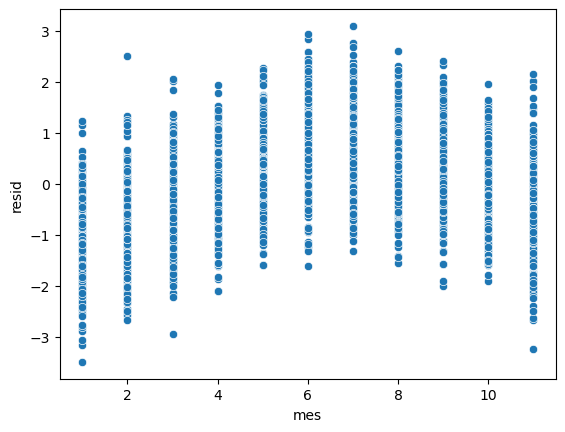

In [59]:
#plotando resíduo de cada mês
sns.scatterplot(x='mes',y='resid',data=df_train)

In [60]:
#calculando resíduo médio por mês
media_por_mes = df_train.groupby('mes')['resid'].mean()
media_por_mes

mes
1    -0.995412
2    -0.703995
3    -0.386959
4    -0.004366
5     0.353253
6     0.672093
7     0.670757
8     0.543835
9     0.334656
10    0.032921
11   -0.406794
Name: resid, dtype: float64

<AxesSubplot:xlabel='mes'>

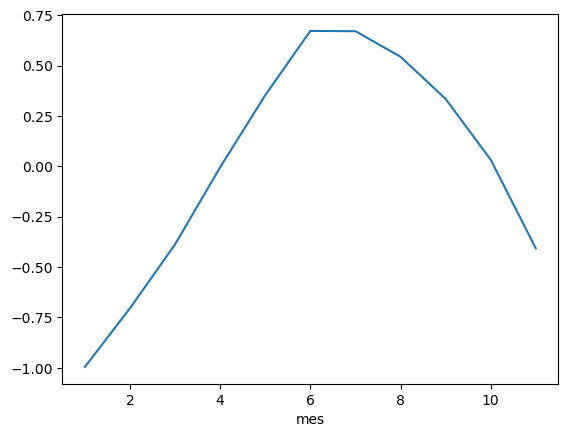

In [61]:
#plotando resíduo médio por mês
media_por_mes.plot()

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [62]:
df_train.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'resid', 'mes'],
      dtype='object')

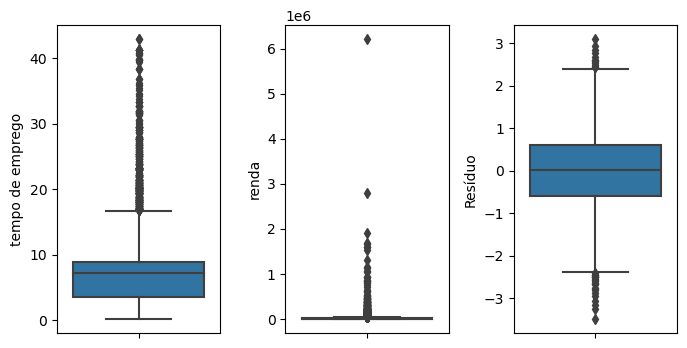

In [63]:
fix, ax = plt.subplots(1, 3, figsize=(8,4))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'tempo_emprego',data=df_train, ax=ax[0])
sns.boxplot(y = 'renda',data=df_train, ax=ax[1])
sns.boxplot(y = res.resid ,data=df_train, ax=ax[2]);

ax[0].set_ylabel('tempo de emprego')
ax[2].set_ylabel('renda')
ax[2].set_ylabel('Resíduo');


<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

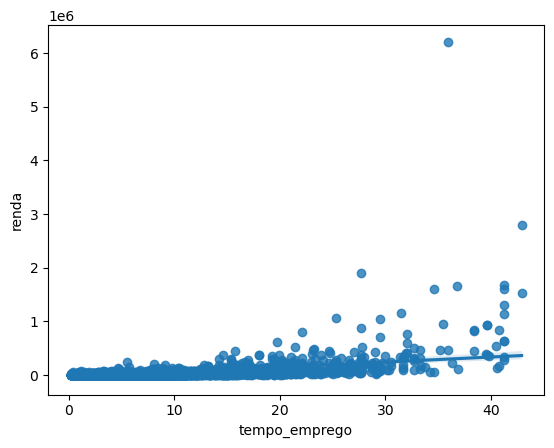

In [64]:
fig, ax = plt.subplots()

sns.regplot(x='tempo_emprego',y='renda',data=df_train,ax=ax)

In [65]:
df_train['log_renda'] = np.log(df_train['renda'])

C:\Users\felip\AppData\Local\Temp\ipykernel_5704\793232897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['log_renda'] = np.log(df_train['renda'])


<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

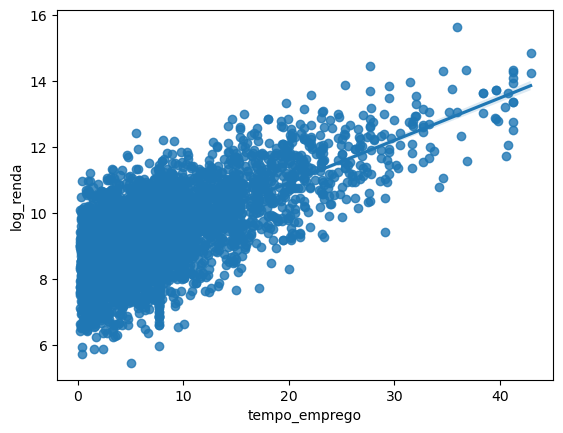

In [66]:
fig, ax = plt.subplots()

sns.regplot(x='tempo_emprego',y='log_renda',data=df_train,ax=ax)

In [67]:
df_train.sort_values('log_renda').head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,resid,mes,log_renda
6908,2015-01-01,971,F,N,S,1,Assalariado,Médio,Casado,Governamental,43,5.090411,3.0,231.92,-3.489288,1,5.446392
526427,2015-11-01,14204,F,N,S,1,Assalariado,Médio,Casado,Casa,30,0.369863,3.0,300.59,-2.630151,11,5.705747
37421,2015-01-01,7544,M,S,S,0,Assalariado,Médio,Casado,Casa,47,1.515068,2.0,358.66,-2.781336,1,5.882375
17757,2015-01-01,83,M,N,S,0,Assalariado,Médio,Solteiro,Casa,24,2.435616,1.0,359.08,-2.884867,1,5.883545
24485,2015-01-01,15901,F,N,N,0,Empresário,Superior incompleto,Casado,Casa,31,0.375342,2.0,378.32,-2.228540,1,5.935740


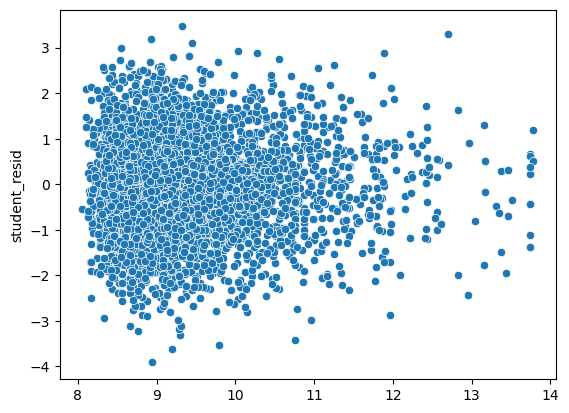

In [70]:
st_res = res.outlier_test()
sns.scatterplot(x = res.predict(), y = st_res.student_resid);

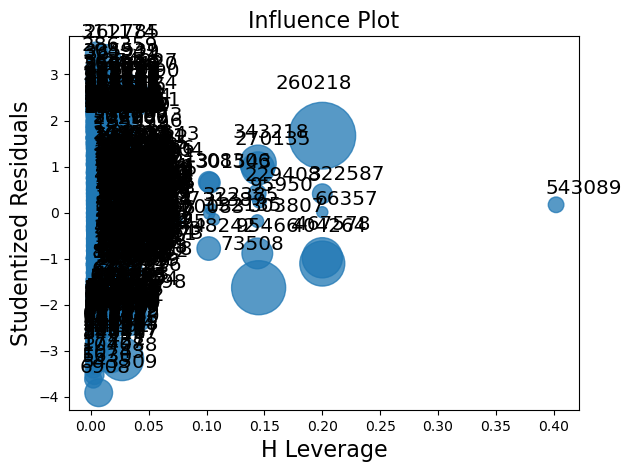

In [71]:
fig = sm.graphics.influence_plot(res, criterion="cooks")
fig.tight_layout(pad=1.0)

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [75]:
df.drop('index',axis=1).corr(method='spearman')

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.420577,-0.100649,0.832794,-0.032905
idade,-0.420577,1.000000,0.310178,-0.358605,0.129283
tempo_emprego,-0.100649,0.310178,1.000000,-0.062976,0.500305
qt_pessoas_residencia,0.832794,-0.358605,-0.062976,1.000000,-0.019965
renda,-0.032905,0.129283,0.500305,-0.019965,1.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 61121 to 168814
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               7500 non-null   datetime64[ns]
 1   index                  7500 non-null   int64         
 2   sexo                   7500 non-null   object        
 3   posse_de_veiculo       7500 non-null   object        
 4   posse_de_imovel        7500 non-null   object        
 5   qtd_filhos             7500 non-null   int64         
 6   tipo_renda             7500 non-null   object        
 7   educacao               7500 non-null   object        
 8   estado_civil           7500 non-null   object        
 9   tipo_residencia        7500 non-null   object        
 10  idade                  7500 non-null   int64         
 11  tempo_emprego          7500 non-null   float64       
 12  qt_pessoas_residencia  7500 non-null   float64       
 1

In [80]:
variaveis = ['sexo','posse_de_veiculo','posse_de_imovel','educacao']

In [81]:
df_dum = pd.get_dummies(df[variaveis], drop_first=True)
df_dum.head()

,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,educacao_Médio,educacao_Pós graduação,educacao_Superior completo,educacao_Superior incompleto
61121,1,1,1,0,0,1,0
202069,1,1,1,1,0,0,0
48162,0,0,1,0,0,1,0
592719,1,1,0,0,0,1,0
590176,0,0,1,0,0,1,0


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [86]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,0.13,sexo_M
1,0.13,posse_de_veiculo_S
2,0.12,posse_de_imovel_S
3,0.08,educacao_Médio
4,1.01,educacao_Pós graduação
5,0.07,educacao_Superior completo
6,0.10,educacao_Superior incompleto


### Não há necessidade de fazer nenhuma alteração nas variáveis em relação ao vif

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.